In [22]:

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from wordcloud import WordCloud

In [5]:
#getting encoding error so switching to latin-1
movie_set = pd.read_csv("allyears_test.csv",encoding='latin-1')
movie_set.head()

,Year,Rank,Title
0,1980,1,Star Wars: The Empire Strikes Back
1,1980,3,Stir Crazy
2,1980,5,Any Which Way You Can
3,1980,7,Coal Miner's Daughter
4,1980,9,The Blue Lagoon


In [45]:
titles_only = movie_set['Title'].fillna('')


vectorizer_movies = CountVectorizer(max_features = 25, 
                             ngram_range=(2, 3), 
                             stop_words='english',
                             binary=False)

vectorizer_movies.fit(titles_only)
X_movies = vectorizer_movies.transform(titles_only)

In [46]:
print((vectorizer_movies.get_feature_names(), np.ravel(X_movies.sum(axis=0))))

(['beverly hills', 'die hard', 'elm street', 'fast furious', 'friday 13th', 'harry potter', 'ice age', 'jungle book', 'mission impossible', 'nightmare elm', 'nightmare elm street', 'ninja turtles', 'paranormal activity', 'perry madea', 'pirates caribbean', 'police academy', 'resident evil', 'scary movie', 'spider man', 'star trek', 'star wars', 'teenage mutant', 'teenage mutant ninja', 'tyler perry', 'tyler perry madea'], array([ 7,  5,  6,  5,  9,  8,  5,  5,  5,  6,  6,  5,  5,  5,  5,  6,  6,
        5,  6, 12, 12,  5,  5, 15,  5], dtype=int64))


In [47]:
movie_pairs = ((vectorizer_movies.get_feature_names(), np.ravel(X_movies.sum(axis=0))))

In [48]:
pairs_dict = dict(zip(movie_pairs[0],movie_pairs[1]))
pairs_dict

{'beverly hills': 7,
 'die hard': 5,
 'elm street': 6,
 'fast furious': 5,
 'friday 13th': 9,
 'harry potter': 8,
 'ice age': 5,
 'jungle book': 5,
 'mission impossible': 5,
 'nightmare elm': 6,
 'nightmare elm street': 6,
 'ninja turtles': 5,
 'paranormal activity': 5,
 'perry madea': 5,
 'pirates caribbean': 5,
 'police academy': 6,
 'resident evil': 6,
 'scary movie': 5,
 'spider man': 6,
 'star trek': 12,
 'star wars': 12,
 'teenage mutant': 5,
 'teenage mutant ninja': 5,
 'tyler perry': 15,
 'tyler perry madea': 5}

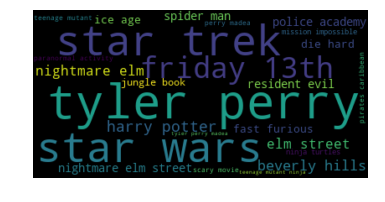

In [49]:
movieswordcloud = WordCloud().generate_from_frequencies(pairs_dict)
plt.figure()
plt.imshow(movieswordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
#it's beautiful

In [37]:
#time to make it happen with legos, because it's too cool not to
lego_set = pd.read_csv("lego_out_modified.csv")
lego_set.head()

,year,full_name
0,2004.0,"Sports,Gravity Games"
1,2012.0,",Friends"
2,1999.0,"Space,Insectoids"
3,1990.0,"Service Packs,Town"
4,1969.0,"Classic,Supplemental"


In [50]:
fullname_only = lego_set['full_name'].fillna('')


vectorizer_lego = CountVectorizer(max_features = 25, 
                             ngram_range=(2, 3), 
                             stop_words='english',
                             binary=False)

vectorizer_lego.fit(fullname_only)
X_legos = vectorizer_lego.transform(fullname_only)
#expanded max_features to 100 because didn't see Harry Potter earlier. It's there with 12.

In [51]:
lego_pairs = ((vectorizer_lego.get_feature_names(), np.ravel(X_legos.sum(axis=0))))

In [52]:
lego_pairs_dict = dict(zip(lego_pairs[0],lego_pairs[1]))
lego_pairs_dict

{'advent sub': 31,
 'advent sub set': 31,
 'basic model': 41,
 'basic set': 54,
 'building set': 117,
 'building set basic': 41,
 'classic town': 214,
 'collectible minifigures': 28,
 'educational dacta': 91,
 'model airport': 27,
 'model construction': 28,
 'packs technic': 29,
 'service packs': 117,
 'service packs technic': 29,
 'set basic': 41,
 'star wars': 226,
 'star wars episode': 85,
 'star wars star': 74,
 'sub set': 31,
 'super heroes': 44,
 'universal building': 110,
 'universal building set': 110,
 'wars episode': 85,
 'wars star': 74,
 'wars star wars': 74}

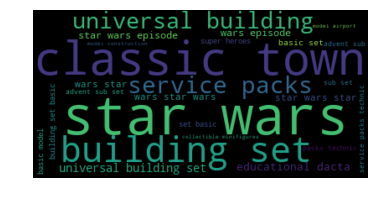

In [53]:
legoswordcloud = WordCloud().generate_from_frequencies(lego_pairs_dict)
plt.figure()
plt.imshow(legoswordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()